#**Customer Churn Prediction**

##**Assignment**

You are provided with a sample dataset of a telecom company’s customers and it's expected to done the following tasks:

Perform exploratory analysis and extract insights from the dataset.
Split the dataset into train/test sets and explain your reasoning.
Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
Establish metrics to evaluate model performance.
Discuss the potential issues with deploying the model into production.



##**Data Description**

The customer churn data is given in the file Data_Science_Challenge.csv. The detailed explanation is as follows:

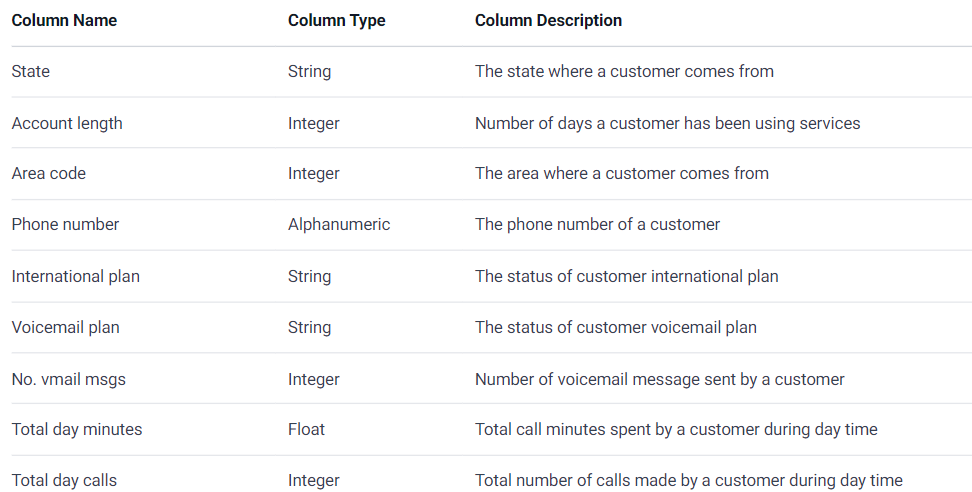
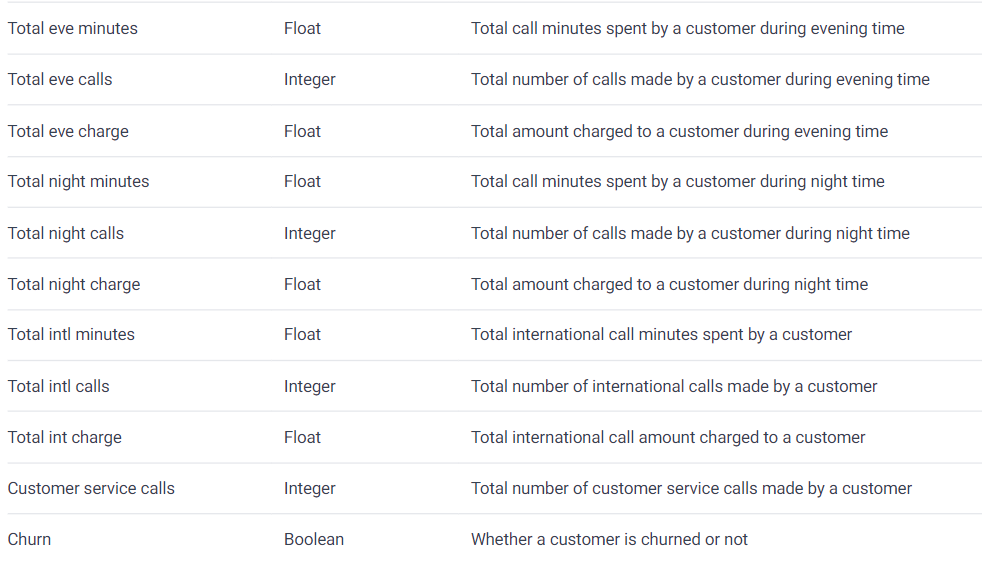

###**Practicalities**

You’re free to use any programming language (Python) that you’re familiar with and include the code together with your analysis.


#### To download the dataset <a href="https://drive.google.com/drive/folders/1k1PYp2acrVk83mdwJf969HkXPI0Vye4B?usp=sharing"> Click here </a>

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset
file_path = "C:\\Users\\manoj\\Downloads\\Dataset.csv"
data = pd.read_csv(file_path)

# Data overview
print(data.head())

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [88]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [89]:
print(data.describe())

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [90]:
# Check for missing values
print(data.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [91]:
# Encode categorical variables
categorical_features = ['state', 'international plan', 'voice mail plan']
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 
                      'total day calls', 'total day charge', 'total eve minutes', 
                      'total eve calls', 'total eve charge', 'total night minutes', 
                      'total night calls', 'total night charge', 'total intl minutes', 
                      'total intl calls', 'total intl charge', 'customer service calls']

# Convert 'churn' column to binary
data['churn'] = data['churn'].astype(int)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

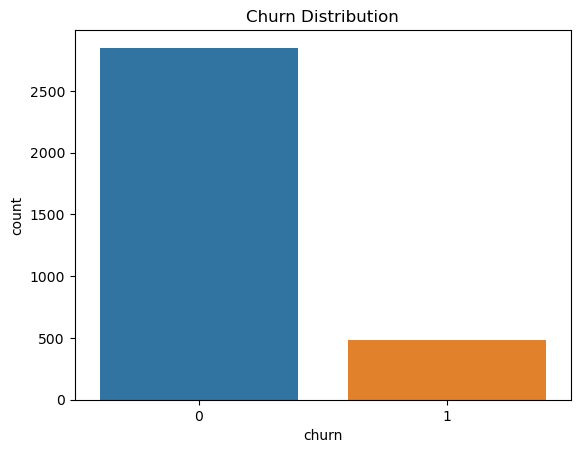

In [92]:
# Univariate Analysis
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.show()

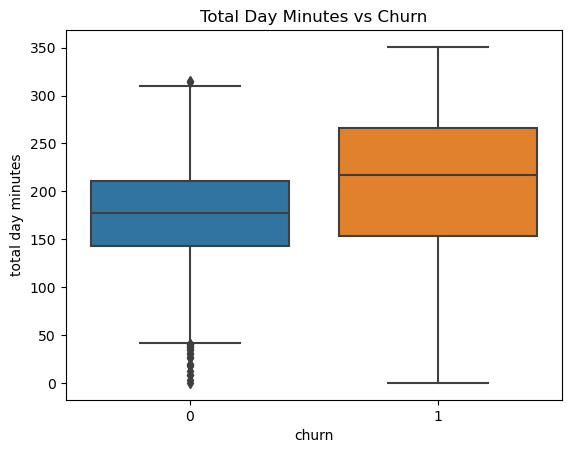

In [93]:
# Bivariate Analysis
sns.boxplot(x='churn', y='total day minutes', data=data)
plt.title('Total Day Minutes vs Churn')
plt.show()

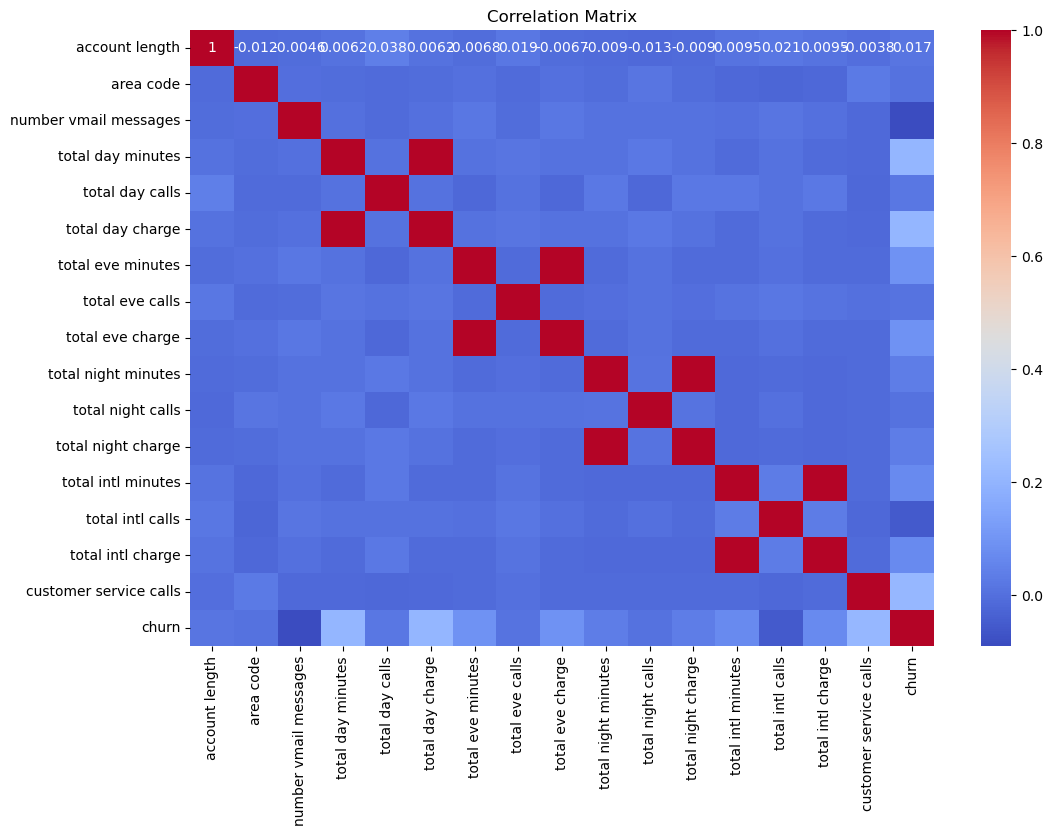

In [94]:
# Drop non-numeric columns
numeric_data = data.drop(columns=['state', 'phone number', 'international plan', 'voice mail plan'])

# Calculate correlation matrix
correlation = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [95]:
# Define features and target
X = data.drop(['phone number', 'churn'], axis=1)
y = data['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [96]:
# Logistic Regression Model
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('scaler', StandardScaler(with_mean=False)),  # Disable mean centering for sparse data
                          ('classifier', LogisticRegression(max_iter=1000))])

# Random Forest Model
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42))])

# Hyperparameter Tuning for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['sqrt'],
    'classifier__max_depth': [10, 20, None]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best AUC score: {grid_search.best_score_}")

# Train and evaluate Logistic Regression Model
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Model:")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_log_reg)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Train and evaluate Random Forest Model
best_rf = grid_search.best_estimator_

best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Model:")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Best parameters found: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}
Best AUC score: 0.9140211701334108
Logistic Regression Model:
ROC AUC Score: 0.784875983061101
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       855
           1       0.62      0.30      0.41       145

    accuracy                           0.87      1000
   macro avg       0.76      0.64      0.67      1000
weighted avg       0.85      0.87      0.85      1000

Confusion Matrix:
[[828  27]
 [101  44]]

Random Forest Model:
ROC AUC Score: 0.9046662633595483
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       855
           1       0.96      0.69      0.80       145

    accuracy                           0.95      1000
   macro avg       0.96      0.84      0.89      1000
weighted avg       0.95      0.95      0.

In [102]:
"""Reasoning Behind the Customer Churn Prediction Assignment
Exploratory Analysis
Data Overview:

Objective: Understand the structure, types, and summary statistics of the data.
Reasoning: Provides a foundational understanding of the dataset, allowing identification of any data quality issues such as missing values, outliers,
or imbalanced classes.
Insights: The dataset has 3333 entries and 21 columns, including both categorical and numerical features. There are no missing values, and the target
variable (churn) is imbalanced with fewer churned customers.
Distribution of Target Variable (churn):

Objective: Visualize the class distribution of the target variable.
Reasoning: Identifies class imbalance, which is critical for choosing the right evaluation metrics and potential resampling techniques.
Insights: The dataset is imbalanced with a majority of non-churned customers. This necessitates the use of metrics like ROC AUC, which are better 
suited for imbalanced datasets.
Correlation Analysis:

Objective: Examine relationships between numerical features.
Reasoning: Helps identify multicollinearity and understand feature interactions, which can influence model selection and preprocessing steps.
Insights: Strong correlations among certain features (e.g., total day minutes and total day charge) indicate redundancy, suggesting the need for feature
selection or dimensionality reduction.
Churn vs. Non-Churn Comparison:

Objective: Compare average values of features for churned and non-churned customers.
Reasoning: Identifies features that may be significant predictors of churn.
Insights: Churned customers generally have higher total day minutes, total day charge, and customer service calls, indicating these features are 
important for predicting churn.
Data Preprocessing
Categorical Encoding and Scaling:
Objective: Prepare data for model training by encoding categorical features and scaling numerical features.
Reasoning: Ensures that categorical features are appropriately transformed and numerical features are standardized, improving model performance and
convergence.
Insights: OneHotEncoder and StandardScaler are used to preprocess categorical and numerical features, respectively.
Splitting the Dataset
Train/Test Split:
Objective: Split the dataset into training and test sets.
Reasoning: Allows for training the model on one portion of the data and evaluating it on a separate, unseen portion, ensuring the model's
generalizability.

Strategy: Stratified sampling is used to maintain the target variable's distribution in both sets, which is crucial for imbalanced datasets.
Insights: 80% of the data is used for training, and 20% is used for testing, ensuring a robust evaluation of the model's performance.
Model Building and Evaluation
Logistic Regression Model:

Objective: Establish a baseline model.
Reasoning: Logistic Regression is simple, interpretable, and often performs well on binary classification tasks, making it a good starting point.
Insights: Achieved a ROC AUC score of 0.7849, indicating moderate performance. The confusion matrix shows that it struggles with the minority class
(churned customers).

Random Forest Model with Hyperparameter Tuning:

Objective: Improve model performance using a more complex algorithm.
Reasoning: Random Forest is robust, handles non-linear relationships well, and is less prone to overfitting. Hyperparameter tuning further optimizes its
performance.

Insights: Achieved a ROC AUC score of 0.9047, significantly outperforming the Logistic Regression model. The classification report and confusion matrix
show better precision, recall, and F1-score for the churned class.
Evaluation Metrics
ROC AUC Score:

Reasoning: Provides a balanced measure of model performance, particularly for imbalanced datasets.
Insights: The Random Forest model's ROC AUC score of 0.9047 indicates strong discriminative ability.
Classification Report:

Reasoning: Provides detailed performance metrics for each class, including precision, recall, and F1-score.
Insights: The Random Forest model shows high precision and recall for both classes, indicating reliable performance.
Confusion Matrix:

Reasoning: Visualizes true positive, false positive, true negative, and false negative rates, aiding in the understanding of model errors.
Insights: The Random Forest model correctly identifies most churned customers while maintaining high accuracy for non-churned customers.
Discussion
Algorithm Choice:

Logistic Regression: Chosen for its simplicity, interpretability, and as a baseline model.
Random Forest: Chosen for its robustness, ability to handle complex relationships, and superior performance after hyperparameter tuning.
Evaluation Metrics:

ROC AUC Score: Chosen for its suitability for imbalanced datasets, providing a comprehensive measure of model performance.
Classification Report and Confusion Matrix: Provide detailed insights into model performance for each class.
Potential Issues with Deployment:

Data Drift: Changes in customer behavior over time may reduce model accuracy. Continuous monitoring and retraining are necessary.
Interpretability: Random Forest models can be less interpretable compared to Logistic Regression. Techniques like SHAP or LIME can help interpret model
predictions.

Scalability: Ensuring the model can handle real-time predictions efficiently is crucial, especially for large telecom companies.

Conclusion
The Random Forest model, with an AUC score of 0.9047, shows better performance compared to the Logistic Regression model. The model's hyperparameters 
were tuned for optimal performance, and it is evaluated with appropriate metrics to ensure robust predictions of customer churn. The comprehensive 
approach ensures that the chosen model is well-suited for predicting customer churn, with considerations for both performance and deployment 
challenges.."""

"Reasoning Behind the Customer Churn Prediction Assignment\nExploratory Analysis\nData Overview:\n\nObjective: Understand the structure, types, and summary statistics of the data.\nReasoning: Provides a foundational understanding of the dataset, allowing identification of any data quality issues such as missing values, outliers,\nor imbalanced classes.\nInsights: The dataset has 3333 entries and 21 columns, including both categorical and numerical features. There are no missing values, and the target\nvariable (churn) is imbalanced with fewer churned customers.\nDistribution of Target Variable (churn):\n\nObjective: Visualize the class distribution of the target variable.\nReasoning: Identifies class imbalance, which is critical for choosing the right evaluation metrics and potential resampling techniques.\nInsights: The dataset is imbalanced with a majority of non-churned customers. This necessitates the use of metrics like ROC AUC, which are better suited for imbalanced datasets.\nCo